# How well do Jobs and Skills pay for a Data Analyst


In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() #It stores data as data sets, we converted it to dataframe

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)


In [62]:
df_IN = df.loc[(df['job_country'] == 'India')].copy()
df_IN=df_IN.loc[df_IN['salary_year_avg'].notnull()]

In [63]:
df_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [64]:
job_titles=list(df_IN['job_title_short'].head(6).sort_values())
job_titles

['Data Engineer',
 'Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [65]:
df_IN_top6=df_IN[df_IN['job_title_short'].isin(job_titles) ]

In [66]:
order=df_IN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

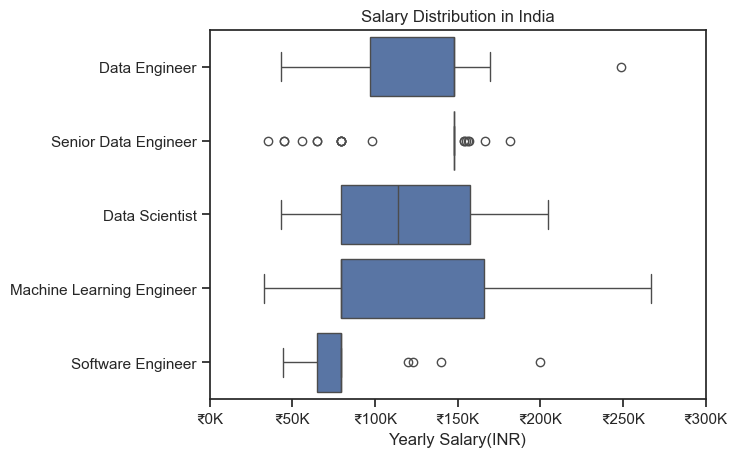

In [67]:
import seaborn as sns
sns.boxplot(data=df_IN_top6,x='salary_year_avg',y='job_title_short',order=order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in India')
plt.xlabel('Yearly Salary(INR)')
plt.ylabel('')
plt.xlim(0,300000)
ticks_x=plt.FuncFormatter(lambda y,pos:f'₹{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigating Median Salary vs Skill for Data Analytics

In [68]:
df_DA_IN = df.loc[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IN=df_DA_IN.loc[df_DA_IN['salary_year_avg'].notnull()]

In [69]:
df_DA_IN=df_DA_IN.explode('job_skills')
df_DA_IN[['job_skills','salary_year_avg']].head(5)

,job_skills,salary_year_avg
11412,python,50400.0
11412,sql,50400.0
11412,aws,50400.0
11412,azure,50400.0
11412,excel,50400.0


In [70]:
df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_IN_top_pay=df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
df_DA_IN_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [71]:
df_DA_IN_top_skills=df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)
df_DA_IN_top_skills_sorted=df_DA_IN_top_skills.sort_values(by='median',ascending=False)

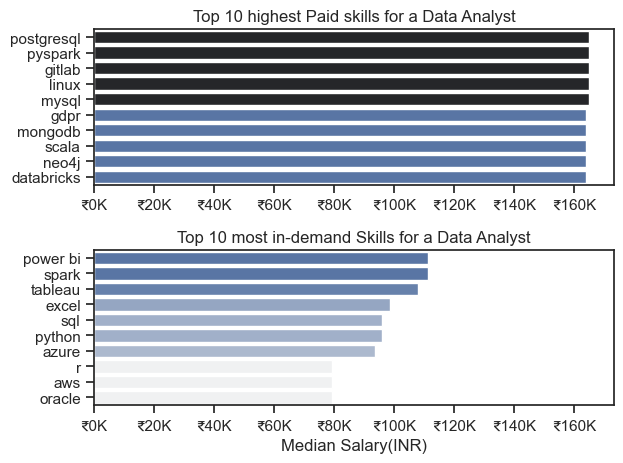

In [72]:
import seaborn as sns
fig, ax=plt.subplots(2,1)
sns.set_theme(style='ticks')

ticks_x=plt.FuncFormatter(lambda y,pos:f'₹{int(y/1000)}K')

sns.barplot(data=df_DA_IN_top_pay,x='median',y=df_DA_IN_top_pay.index,hue='median',palette='dark:b_r',legend=False,ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 highest Paid skills for a Data Analyst')
ax[0].xaxis.set_major_formatter(ticks_x)

sns.barplot(data=df_DA_IN_top_skills_sorted,x='median',y=df_DA_IN_top_skills_sorted.index,hue='median',palette='light:b',legend=False,ax=ax[1])



ax[1].set_xlabel('Median Salary(INR)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 most in-demand Skills for a Data Analyst')



ax[1].xaxis.set_major_formatter(ticks_x)
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()
plt.show()
